# Homework 2
## Problem 1 (Thresholding)

In [20]:
# Import libraries, we need matplotlib for plotting and skimage for image manipulation
import matplotlib.pyplot as plt
import numpy as np

import skimage as ski
from skimage import io
from skimage.filters import threshold_otsu, threshold_local

In [100]:
# Read in the images using io
calla_lily_png = io.imread("images/robert-mapplethrope-calla-lily-1984.png")
arch_png = io.imread("images/istanbul_arch_museum_gray_crop.png")
calla_lily_crop_png = io.imread("images/robert-mapplethrope-calla-lily-1984_CROP.png")

In [101]:
# Calculate and store threshold values; print them to ensure we have actual results
calla_thresh_value, arch_thresh_value = threshold_otsu(calla_lily_png), threshold_otsu(arch_png)
calla_crop_thresh_value = threshold_otsu(calla_lily_crop_png)

print(calla_thresh_value)
print(arch_thresh_value)
print(calla_crop_thresh_value)

90
123
158


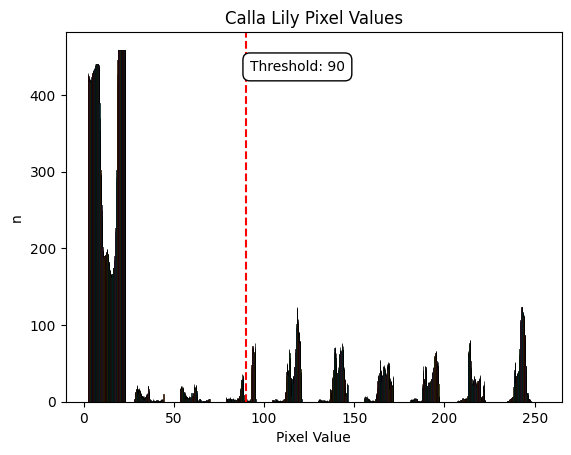

In [104]:
# Test printing out the pixel values of each image (probably commented out later) and 
# plot histograms of the values
# print(calla_lily_png)
# print(arch_png)

# Histogram the Calla Lily first with it's threshold value marked by a red vertical line
calla_histo = plt.hist(calla_lily_png, edgecolor='black', linewidth=0.5)
plt.title('Calla Lily Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('n')
plt.axvline(x=calla_thresh_value, color='red', linestyle='--', linewidth=1.5)
plt.annotate(f'Threshold: {calla_thresh_value}',
             xy=(calla_thresh_value, plt.ylim()[1]), 
             xytext=(37, -20), 
             textcoords='offset points', 
             ha='center', va='top', 
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black'))

plt.savefig('images/homework_2/calla_histo.png')

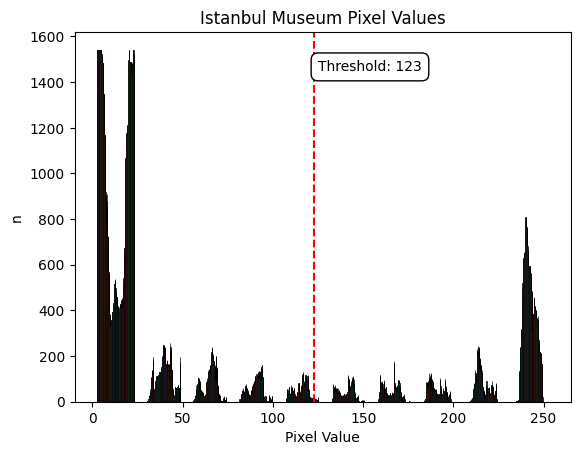

In [105]:
# Histogram the istanbul image next, with its red line as well
arch_histo = plt.hist(arch_png, edgecolor='black', linewidth=0.5)
plt.title('Istanbul Museum Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('n')
plt.axvline(x=arch_thresh_value, color='red', linestyle='--', linewidth=1.5)
plt.annotate(f'Threshold: {arch_thresh_value}',
             xy=(arch_thresh_value, plt.ylim()[1]), 
             xytext=(40, -20), 
             textcoords='offset points', 
             ha='center', va='top', 
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black'))

plt.savefig('images/homework_2/arch_histo.png')

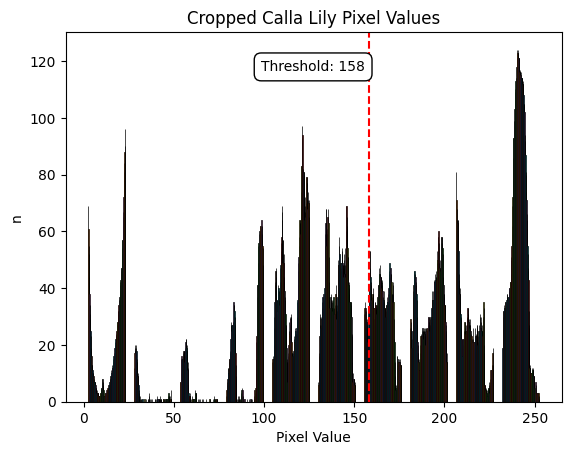

In [106]:
# Histogram the cropped calla lily last
calla_crop_histo = plt.hist(calla_lily_crop_png, edgecolor='black', linewidth=0.5)
plt.title('Cropped Calla Lily Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('n')
plt.axvline(x=calla_crop_thresh_value, color='red', linestyle='--', linewidth=1.5)
plt.annotate(f'Threshold: {calla_crop_thresh_value}',
             xy=(calla_crop_thresh_value, plt.ylim()[1]), 
             xytext=(-40, -20), 
             textcoords='offset points', 
             ha='center', va='top', 
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black'))

plt.savefig('images/homework_2/calla_crop_histo.png')

Now need to threshold the images and save them

In [112]:
thresh_calla = calla_lily_png > threshold_otsu(calla_lily_png)
thresh_arch = arch_png > threshold_otsu(arch_png)
thresh_calla_crop = calla_lily_crop_png > threshold_otsu(calla_lily_crop_png)

io.imsave('images/homework_2/thresh_calla.png', thresh_calla)
io.imsave('images/homework_2/thresh_arch.png', thresh_arch)
io.imsave('images/homework_2/thresh_calla_crop.png', thresh_calla_crop)

C:\Users\bretb\AppData\Local\Temp\ipykernel_3172\3004805447.py:5: UserWarning: images/homework_2/thresh_calla.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('images/homework_2/thresh_calla.png', thresh_calla)
C:\Users\bretb\AppData\Local\Temp\ipykernel_3172\3004805447.py:6: UserWarning: images/homework_2/thresh_arch.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('images/homework_2/thresh_arch.png', thresh_arch)
C:\Users\bretb\AppData\Local\Temp\ipykernel_3172\3004805447.py:7: UserWarning: images/homework_2/thresh_calla_crop.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('images/homework_2/thresh_calla_crop.png', thresh_calla_crop)


## Problem 2 (Thresholding, again.) <br>
### Using global *and* adaptive thresholding

In [40]:
# Importing my new image, that of Marc Chagall's 'I and the Village.'
village_jpg = plt.imread('images/homework_2/village.jpg', 'gray')
# plt.imshow(village_jpg, 'gray')
# print(village_jpg)

# Convert to grayscale
gray_village = np.dot(village_jpg[...,:3], [0.2989, 0.5870, 0.1140])
# print(gray_village) # Confirm values
# print(gray_village.dtype, np.max(gray_village)) # Check types

# Calculate threshold values using otus and adaptive (local)
gray_village_otsu = threshold_otsu(gray_village)
gray_village_adap = threshold_local(gray_village, 101, offset=0, method='gaussian')

# print('Otsu: ', gray_village_otsu, '; ', 'Adaptive: ', gray_village_adap)

Text(0.5, 1.0, 'Adaptive threshold')

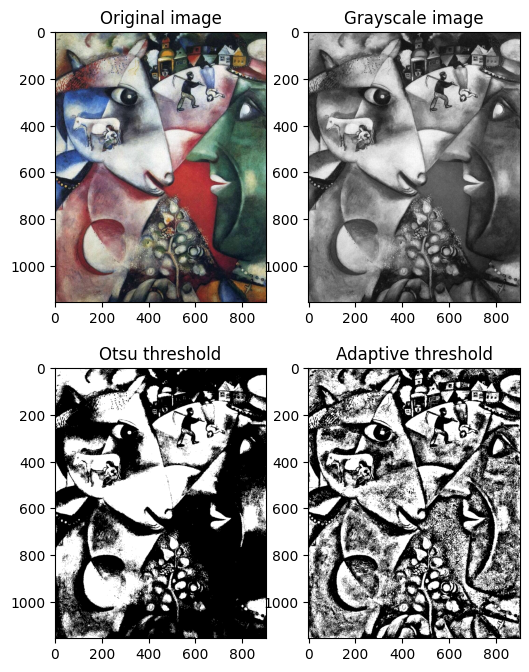

In [41]:
# Apply the threshold to the image and visualize them
otsu_village = gray_village > gray_village_otsu
adap_village = gray_village > gray_village_adap

fig, axes = plt.subplots(2, 2, figsize=(6, 8))
ax = axes.ravel()

ax[0].imshow(village_jpg)
ax[0].set_title('Original image')

ax[1].imshow(gray_village, cmap='gray')
ax[1].set_title('Grayscale image')

ax[2].imshow(otsu_village, cmap='gray')
ax[2].set_title('Otsu threshold')

ax[3].imshow(adap_village, cmap='gray')
ax[3].set_title('Adaptive threshold')